In [1]:
import pandas as pd

In [8]:
## Understanding the dataset
## Data from direct marketing campaigns (phone calls) of a Portuguese banking institution (2008–2010). 
## The campaigns aimed to sell term deposits (a type of fixed-term savings product).
## We want to predict if a client will subscribe to a term deposit(a type of fixed-term savings product).

### Question:  What are the very first steps you would take to understand and inspect this dataset before doing any cleaning, visualization, or modelling?

In [7]:
## Load the dataset

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
## Check the number of clients and the number of features in a client

In [11]:
df.shape

(11162, 17)

In [12]:
## So we have in total 11162 clients. For each client we have around 16 features and one feature deposit that we want to predict

In [21]:
## Numerical columns : age, balance, day, duration, campaign, pdays, previous
## Categorical columns : 
## Nominal columns :  job,  marital, housing, loan, contact, month, poutcome
## Since education column also has unknown, so safely we will keep this as nominal column

### Question: How would you check for missing values or inconsistencies in this dataset, and what strategies would you use to handle them before modelling?

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [23]:
## First check for dupilcates in the dataset

In [24]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [25]:
## No duplicate rows

In [26]:
## Check if there are any nulls in the dataset

In [27]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [28]:
## There are no nulls either

In [34]:
## We see in some columns the value is unknown, we will keep as the information is not known. Will encode unknown as a seperate category

In [29]:
## We can safely proceed further

### Question: For the numerical variables (age, balance, duration, campaign, pdays, previous), would you apply scaling or transformations before logistic regression? If yes, which method and why?

In [35]:
## Yes we will apply scaling as you see the values in different columns differ by significant amount, range for each column is different. So yes scaling will be required

In [36]:
## Standard scalar should be good to go, as it balances each point to its means

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

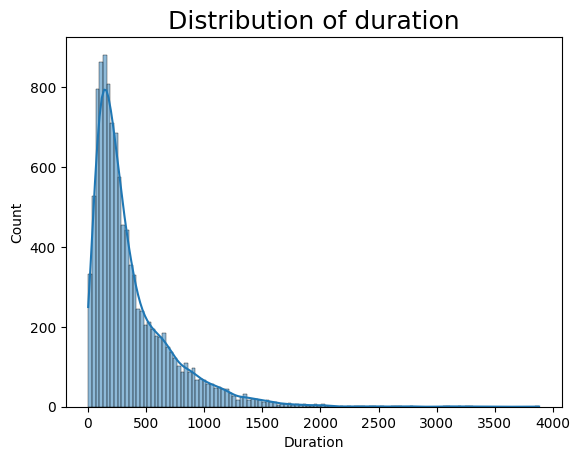

In [40]:
fig, ax = plt.subplots()
ax.set_title('Distribution of duration', fontsize = 18)
sns.histplot(x = 'duration', data = df, kde = True)
ax.set_xlabel('Duration')
ax.set_ylabel('Count')
plt.show()

In [41]:
## For skewed distribution like duration, we may use log transformation. That could help in compressing outliers

### Question : Which exploratory visualizations would you create first to understand the relationship between features and the target variable (deposit)?

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [45]:
## Duration can be significant factor for the target variable. As the duration of the call is more, client tends to connect with the campaign

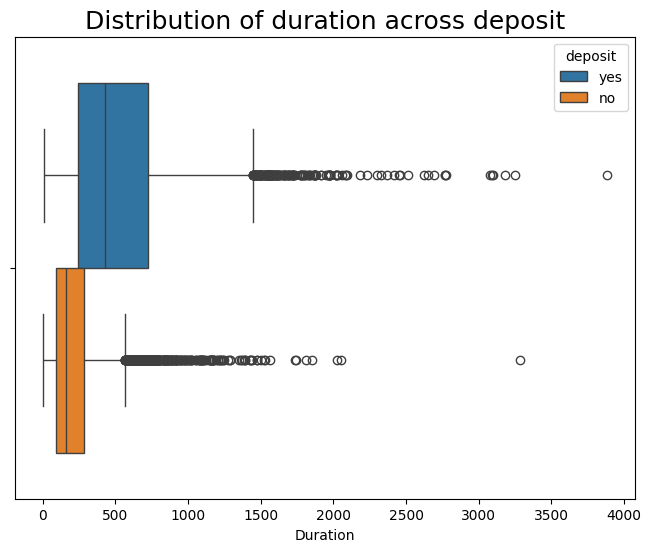

In [51]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Distribution of duration across deposit', fontsize = 18)
sns.boxplot(x = 'duration', data = df, hue = 'deposit')
ax.set_xlabel('Duration')
plt.show()

In [52]:
## From the figure above, it clearly states what we assumed earlier. The median for the duration where deposit is yes is way more that with deposit no.
## Also if you see the IQR for deposit with yes is bigger than that of with deposit no.

In [53]:
df['id'] = df.index

In [54]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,id
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1


In [59]:
## Lets check for the distribution of calls for this campaign

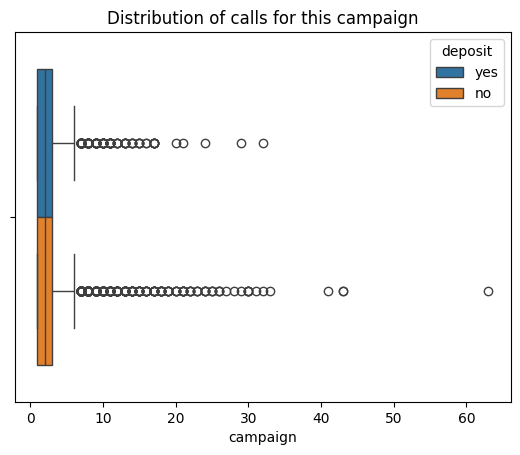

In [62]:
fig, ax = plt.subplots()
ax.set_title('Distribution of calls for this campaign')
sns.boxplot(x = 'campaign', data = df, hue = 'deposit')
plt.show()

In [63]:
## Doesn't give any significant effect , though there are more number of outliers when the number of call exceeded high. That is a point to note.
## Maximum calls, shows low chance for the client to subscribe the deposit

In [64]:
## Lets check for the balance distribution

<Axes: xlabel='balance'>

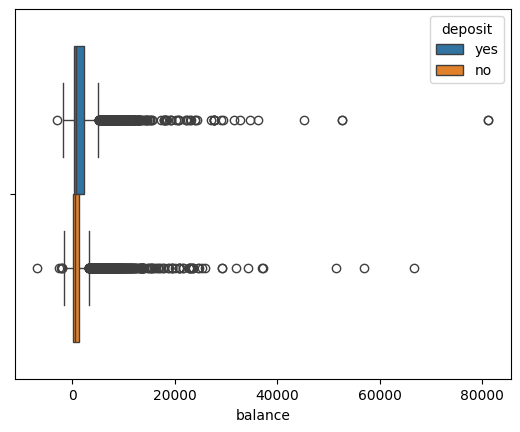

In [65]:
sns.boxplot(x = 'balance', data = df, hue = 'deposit')

In [67]:
## From the graph above, balance can have an impact consider the IQR high in yes deposits, but its not alone a significant contributor

In [68]:
## check for age column

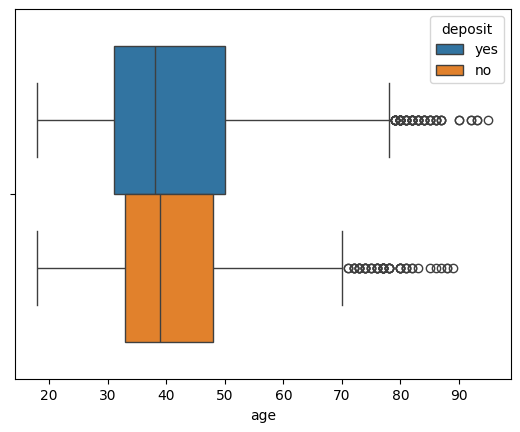

In [70]:
sns.boxplot(x = 'age', data = df, hue = 'deposit')
plt.show()

In [71]:
## Age not a significant criteria at all

In [72]:
## These are some of the first checks

### Question : Which categorical variables would you visualize first against the target (deposit), and how would you present them?

In [73]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,id
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1


In [89]:
## We can check for hosuing loan

In [85]:
df_housing_pivot = df.pivot_table(
                              index = 'deposit',
                              columns = 'housing',
                              values = 'id',
                              aggfunc = 'count',
                              fill_value = 0
                             )

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

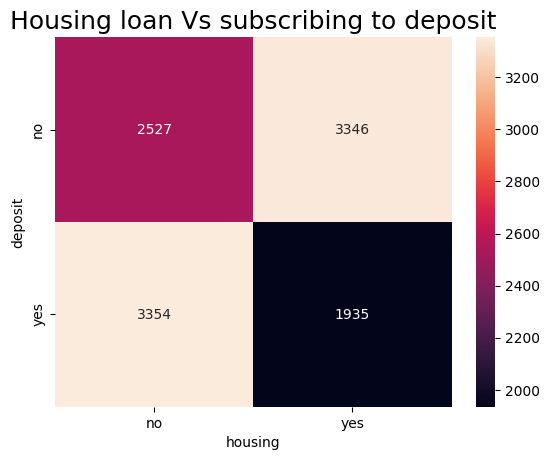

In [87]:
fig, ax = plt.subplots()
ax.set_title('Housing loan Vs subscribing to deposit', fontsize = 18)
sns.heatmap(df_housing_pivot, annot = True, fmt = 'd')
plt.show()

In [88]:
## From the above graph, we clearly see that clients having no housing loans, tends to subscribe to the deposit scheme as compared to other way

In [90]:
## Checking for loan column

In [91]:
df_loan_pivot = df.pivot_table(
                              index = 'deposit',
                              columns = 'loan',
                              values = 'id',
                              aggfunc = 'count',
                              fill_value = 0
                             )

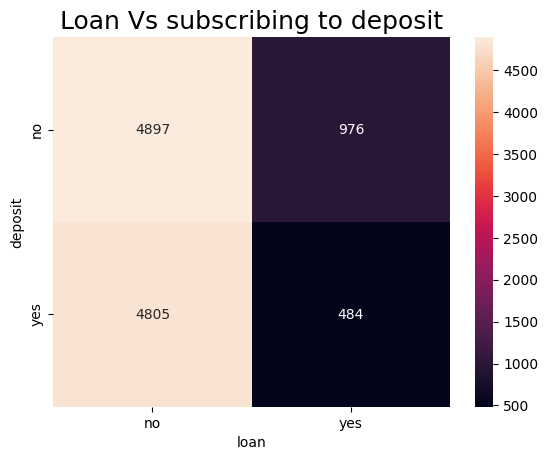

In [92]:
fig, ax = plt.subplots()
ax.set_title('Loan Vs subscribing to deposit', fontsize = 18)
sns.heatmap(df_loan_pivot, annot = True, fmt = 'd')
plt.show()

In [93]:
## From the above graph, we see that clients having any kind of loan, tends to not subscribe to deposit scheme

In [94]:
## Next check for the previous loan outcome

In [96]:
df_previous_loan_outcome_pivot = df.pivot_table(
                              index = 'deposit',
                              columns = 'poutcome',
                              values = 'id',
                              aggfunc = 'count',
                              fill_value = 0
                             )

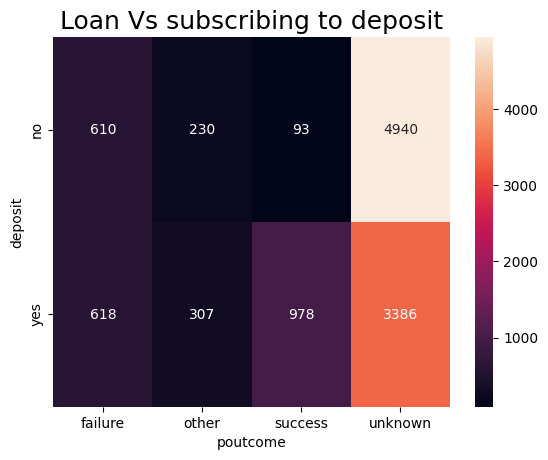

In [99]:
fig, ax = plt.subplots()
ax.set_title('Loan Vs subscribing to deposit', fontsize = 18)
sns.heatmap(df_previous_loan_outcome_pivot, annot = True, fmt = 'd')
plt.show()

In [100]:
## From this graph, we clearly see that for clients having previous outcome as success, tends to more subscribe to this deposit scheme. 
## It is a clear indication

### Question : How would you formally test whether these features (e.g., duration, housing loan, poutcome) are statistically significant predictors of deposit subscription before modelling?

In [101]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,id
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,4


In [102]:
df_numerical = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [104]:
df_corr = df_numerical.corr()

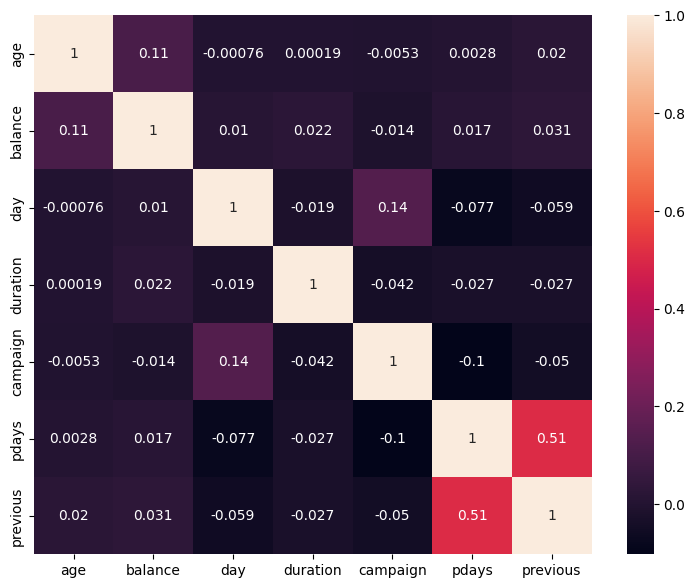

In [106]:
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(df_corr, annot = True)
plt.show()

### Question : How would you split the dataset into train and test sets, and why is this step important before fitting logistic regression?

In [107]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,id
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,4


In [109]:
## Since we considered all categorical columns as nominal, so we first use dummies

In [125]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [126]:
df_categorical = pd.get_dummies(df[categorical_columns], drop_first = True, dtype = int)

In [130]:
df_numerical.head(2)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0


In [128]:
merged_df = pd.concat([df_numerical, df_categorical], axis = 'columns')

In [132]:
merged_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [133]:
### After this we will scale the data

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

In [136]:
X_scaled = scaler.fit_transform(merged_df)

In [139]:
y = df['deposit'].apply(lambda x : 1 if x == 'yes' else 0)

In [141]:
### Next we will split the data into training and test dataset

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10, stratify = y)

### Question : How would you fit a logistic regression model and evaluate its performance? Which metrics would you focus on and why?

In [146]:
from sklearn import linear_model

In [147]:
model = linear_model.LogisticRegression()

In [148]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [149]:
y_pred = model.predict(X_test)

In [150]:
## Check the model score for the training test

In [151]:
model.score(X_train, y_train)

0.8294321872550118

In [153]:
## Now checking the model score for the test data

In [154]:
model.score(X_test, y_test)

0.812807881773399

In [156]:
## The insights that I get is that model score for training data is approx 83% which means, training data set is not over fitted, which means data does not have high variance
## Model is good enough, also the test score that we get is good enough

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
cm = confusion_matrix(y_test, y_pred)

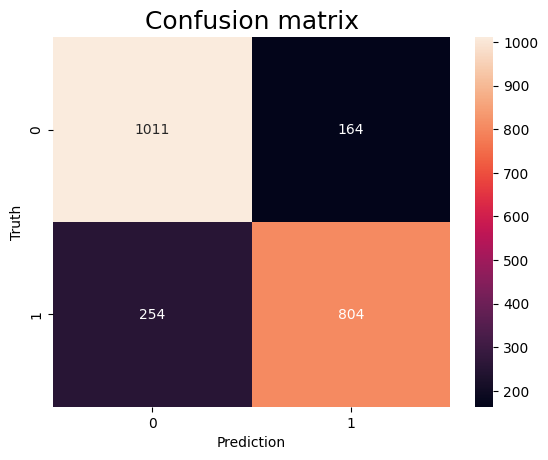

In [163]:
fig, ax = plt.subplots()
ax.set_title('Confusion matrix', fontsize = 18)
sns.heatmap(cm, annot = True, fmt = 'd')
ax.set_xlabel('Prediction')
ax.set_ylabel('Truth')
plt.show()

In [164]:
## We see that the failed ones are 254 + 164

In [165]:
## Precision: Of all predicted “yes”, how many were correct?

In [167]:
precision = 804/(804 + 164)
precision

0.8305785123966942

In [168]:
## Recall (Sensitivity): Of all actual “yes”, how many did we catch?

In [169]:
recall = 804/(804 + 254)
recall

0.7599243856332704

In [170]:
## F1 score = (2 * precision * recall)/(precision + recall)

In [171]:
f1_score = (2 * precision * recall)/(precision + recall)

In [172]:
f1_score

0.7936821322803554

In [173]:
from sklearn.metrics import classification_report

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1175
           1       0.83      0.76      0.79      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



### Question : how would you interpret the logistic regression coefficients to explain which features most influence deposit subscription?

In [176]:
## poutcome and duration directly affect if the client subscribes to the deposit scheme